In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

from sklearn.model_selection import train_test_split


In [2]:
from wrangle import get_connection
from wrangle import wrangle_zillow
from wrangle import get_zillow_data

df = get_zillow_data()
df = wrangle_zillow(df)
df.county = df.county.map({6037:'LA',6059:'Orange',6111:'Ventura'})
df.head()

,propertylandusedesc,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,Single Family Residential,4,2.0,3633,296425,2005,6941.39,LA
6,Single Family Residential,3,4.0,1620,847770,2011,10244.94,LA
7,Single Family Residential,3,2.0,2077,646760,1926,7924.68,LA
11,Single Family Residential,0,0.0,1200,5328,1972,91.60,LA
14,Single Family Residential,0,0.0,171,6920,1973,255.17,LA


In [3]:
def split_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate,
                                       test_size=.3,
                                       random_state=123)
    return train, validate, test

In [4]:
train, validate, test = split_data(df)

print(f'train{train.shape}')
print(f'validate{validate.shape}')
print(f'test{test.shape}')

train(1198531, 8)
validate(513657, 8)
test(428047, 8)


In [5]:
train.head()


,propertylandusedesc,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1567873,Single Family Residential,3,1.0,1248,191578,1950,2712.21,LA
1218138,Single Family Residential,2,2.0,1326,1345206,1950,16539.04,LA
339661,Single Family Residential,2,1.0,1053,356648,1953,4575.16,LA
1017133,Single Family Residential,3,2.0,1256,175069,1946,2635.51,LA
40250,Single Family Residential,3,2.0,1640,543000,1957,6344.96,Orange


# Question 3

### Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



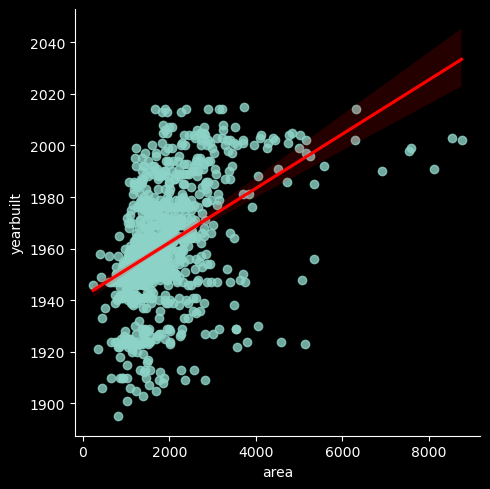

In [6]:
# I can really pop that line color if I want.

sns.lmplot(y="yearbuilt", x="area", data=train.sample(1000), line_kws={'color': 'red'})
plt.show()


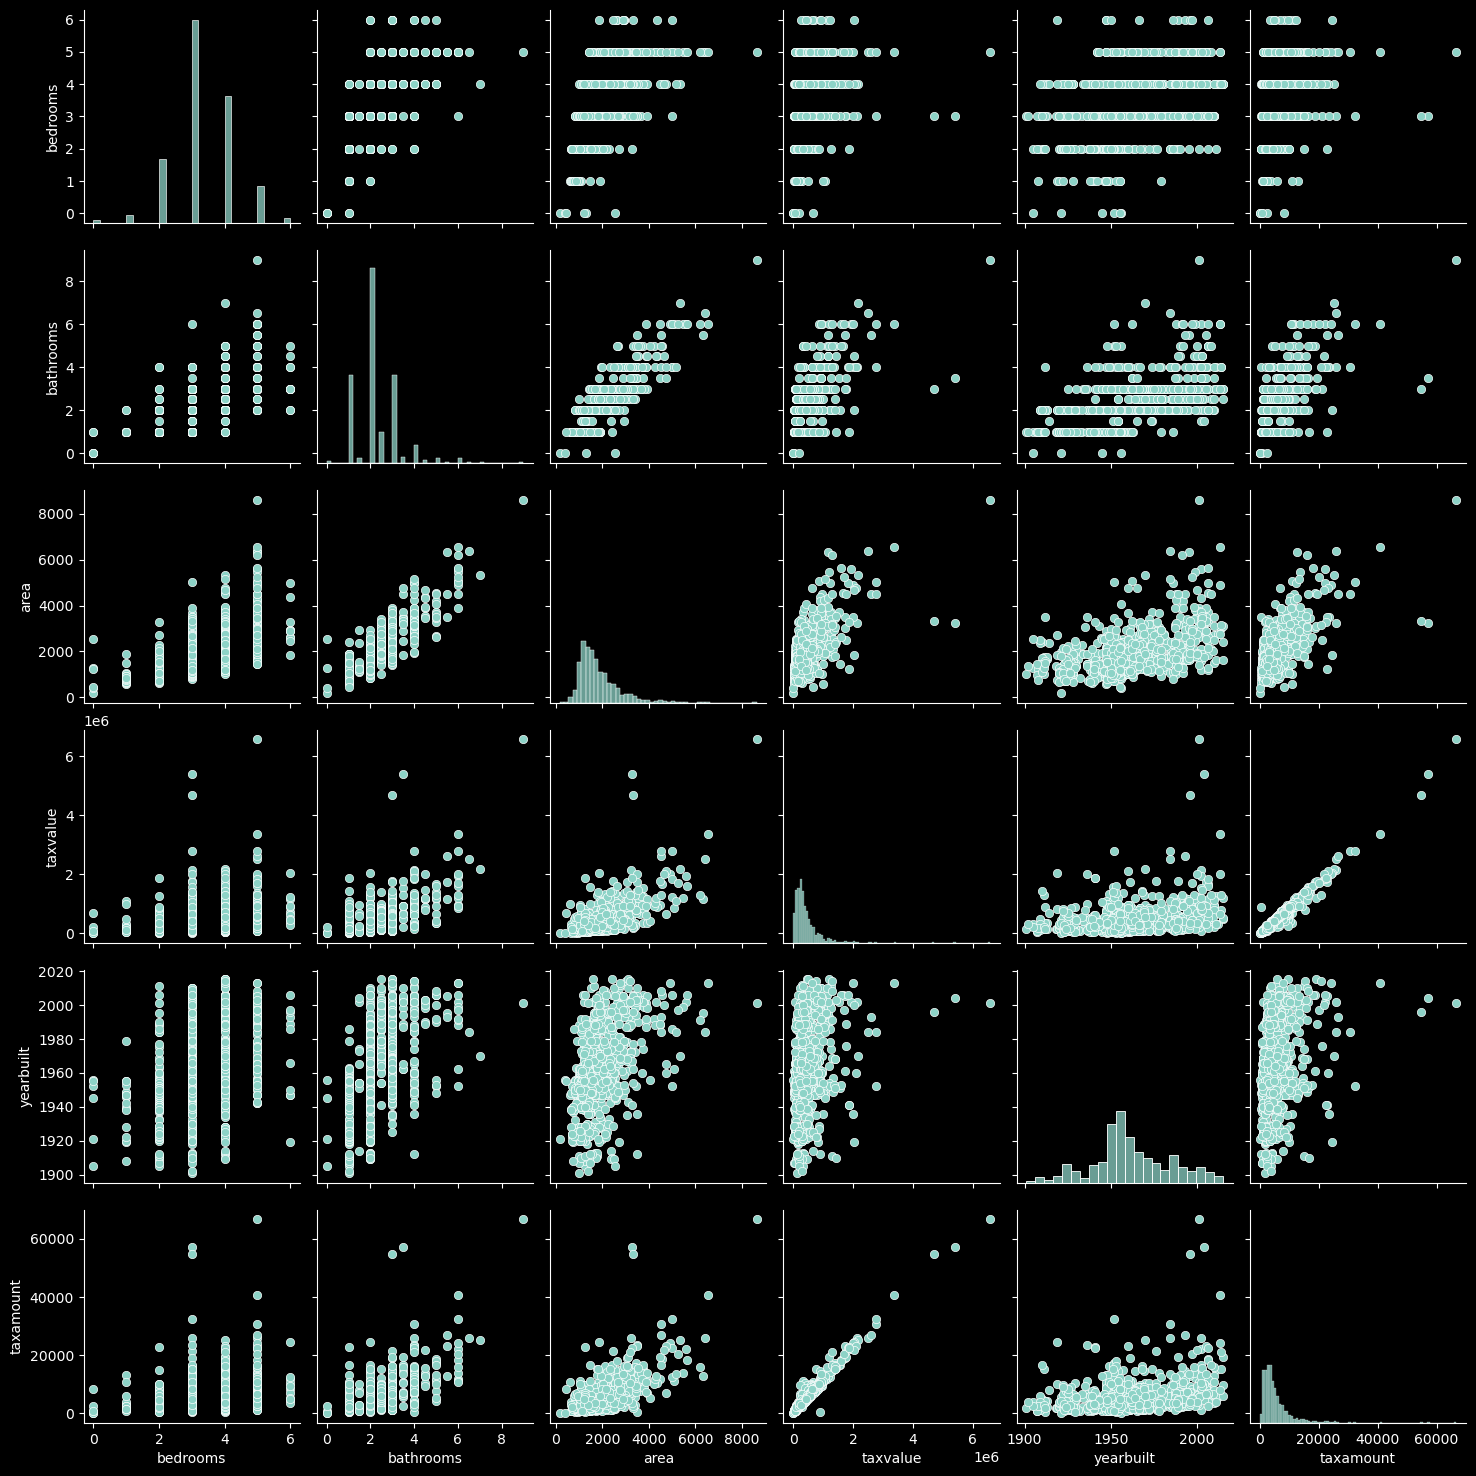

In [7]:
sns.pairplot(train.sample(1000), diag_kind="hist")
plt.show()

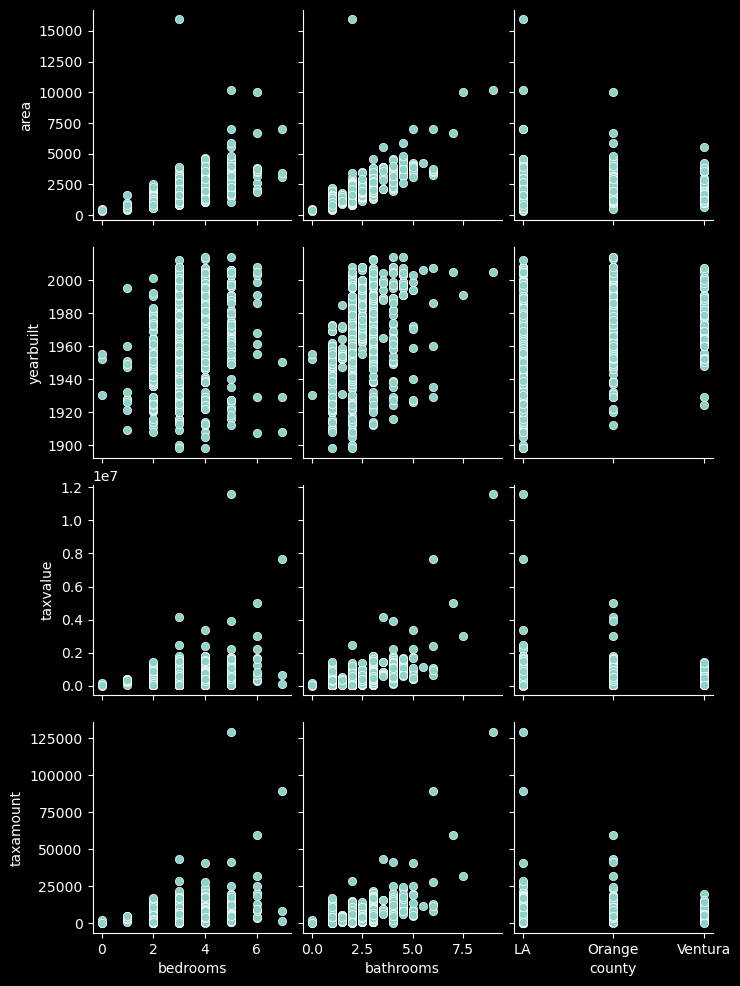

In [8]:
#kwargs = {x_vars=['bedrooms', 'bathrooms', 'county'], y_vars=['area', 'yearbuilt', 'taxvalue', 'taxamount']}

# function call has no more stuff inline

sns.pairplot(train.sample(1000), x_vars=['bedrooms', 'bathrooms', 'county'], y_vars=['area', 'yearbuilt', 'taxvalue', 'taxamount'], diag_kind="hist")

In [26]:
cols = train[['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount']]

def plot_variable_pair(df):
    for i in cols:
        sns.lmplot(y=i, x="taxvalue", data=train.sample(1000), line_kws={'color': 'red'})
        plt.show()
    

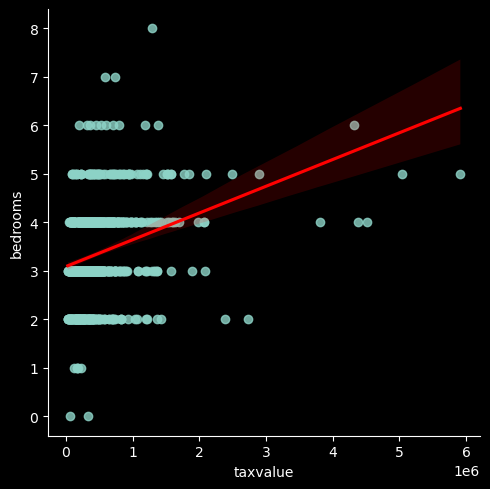

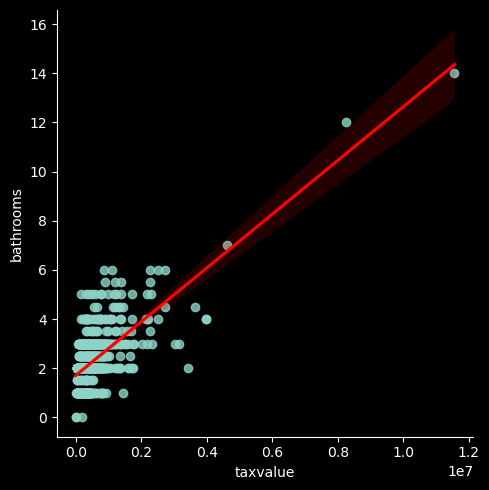

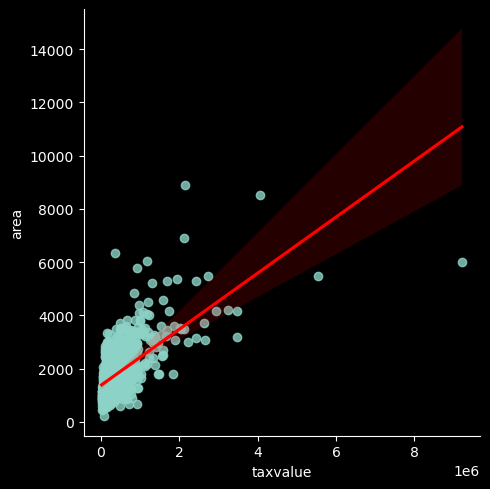

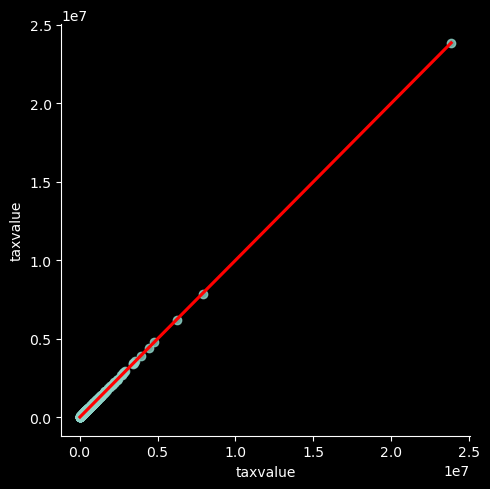

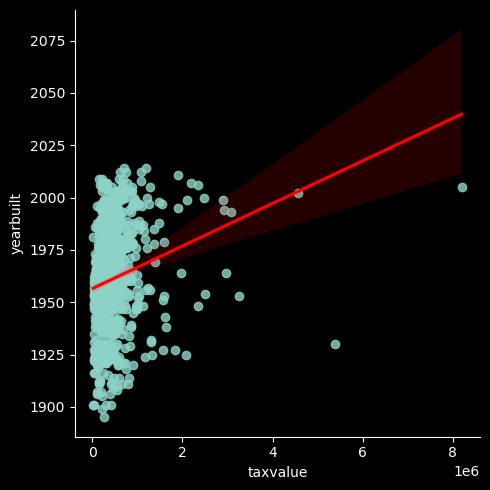

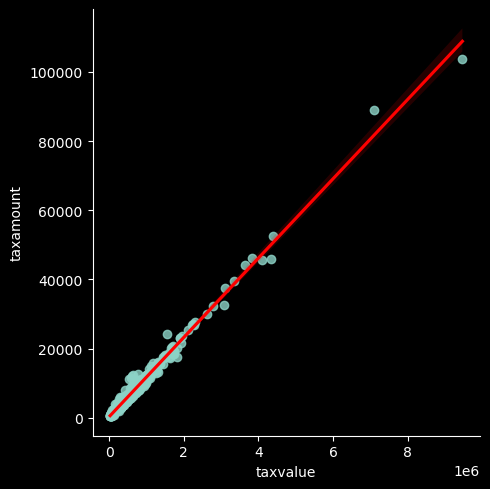

In [27]:
plot_variable_pair(df)

# Question 4

### Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



In [23]:
var1 = train[['area', 'taxvalue', 'yearbuilt', 'taxamount']]
var2 = train[['county', 'bedrooms', 'bathrooms']]

def plot_categorical_and_continuius_vars(df):
    for var1, var2 in zip(var1, var2):
        sns.lmplot(y=var1, x=var2, data=train.sample(1000), line_kws={'color': 'red'})
        plt.show()

In [24]:
plot_categorical_and_continuius_vars(train)

UnboundLocalError: local variable 'var1' referenced before assignment

In [ ]:
train.head()

,propertylandusedesc,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1567873,Single Family Residential,3,1.0,1248,191578,1950,2712.21,6037
1218138,Single Family Residential,2,2.0,1326,1345206,1950,16539.04,6037
339661,Single Family Residential,2,1.0,1053,356648,1953,4575.16,6037
1017133,Single Family Residential,3,2.0,1256,175069,1946,2635.51,6037
40250,Single Family Residential,3,2.0,1640,543000,1957,6344.96,6059


In [ ]:
la = train[train.county == 6037.0]
orange = train[train.county == 6059.0]
ventura = train[train.county == 6111.0]


#   5

### Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.



# 6 

### Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

# 7 

### Come up with some initial hypotheses based on your goal of predicting property value.

    - Is there a relationship between number of bedrooms and taxvalue? 
    - Does more area impact tax value?
    - On average, do homes in LA have a higher taxvalue? 
    - The average taxvalue for a 3 bedroom home is less than a set amount. 
    

# 8

### Visualize all combinations of variables in some way.



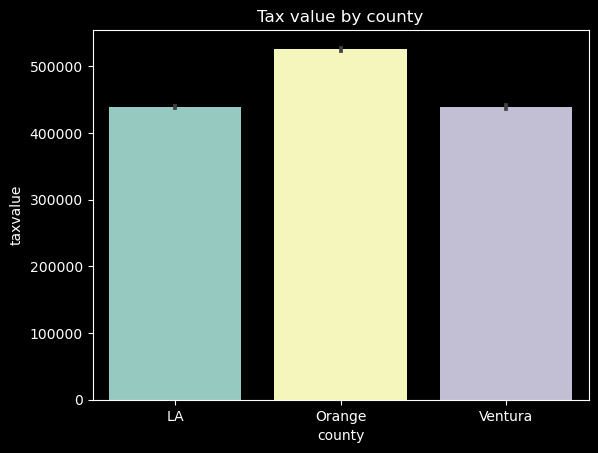

In [45]:
sns.barplot(data=train, x='county', y='taxvalue')
plt.title("Tax value by county")
plt.show()

#### show tax value range by county 

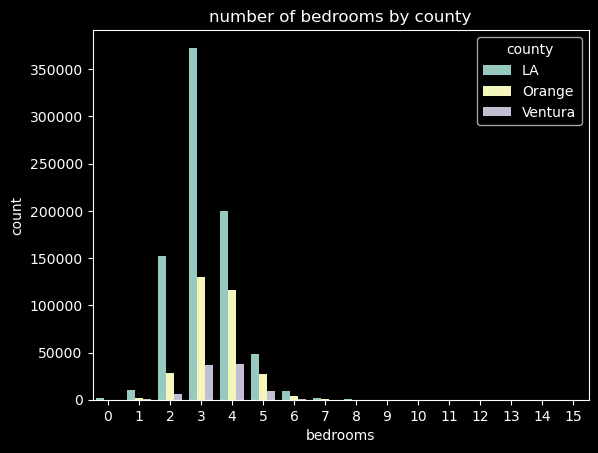

In [56]:
sns.countplot(data=train, x='bedrooms', hue='county')
plt.title("number of bedrooms by county")
plt.show()


#### show the number of bed rooms by county 

#### Can see that LA has the most amonut of single family homes 

#### Majory of homes have 2 to 5 bed rooms

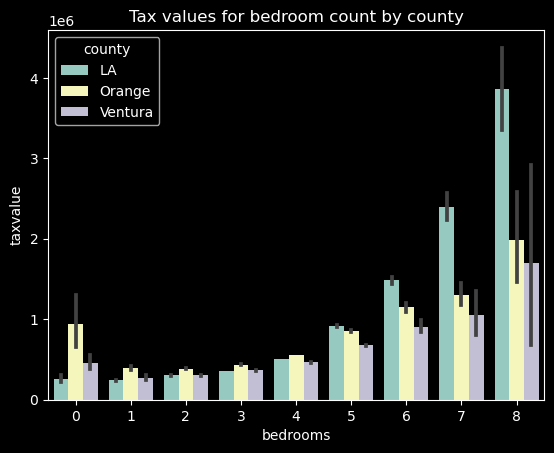

In [58]:
sns.barplot(data=train[train.bedrooms <= 8], x='bedrooms', y='taxvalue', hue='county')
plt.title('Tax values for bedroom count by county')
plt.show()

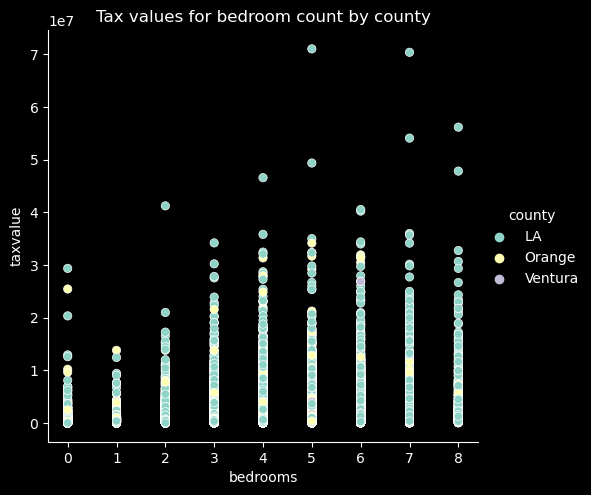

In [59]:
sns.relplot(data=train[train.bedrooms <= 8], x='bedrooms', y='taxvalue', hue='county')
plt.title('Tax values for bedroom count by county')
plt.show()

#### orange county has the highest taxvalue for homes with 4 rooms or less

#### LA county's taxvalue increcess for homes with 5 rooms or more 

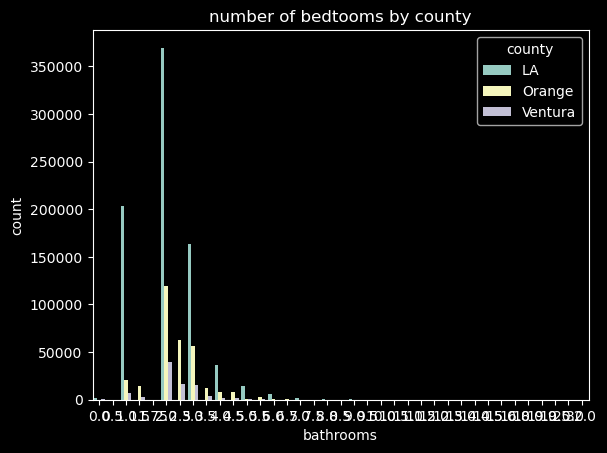

In [32]:
sns.countplot(data=train, x='bathrooms', hue='county')
plt.title("number of bedtooms by county")
plt.show()

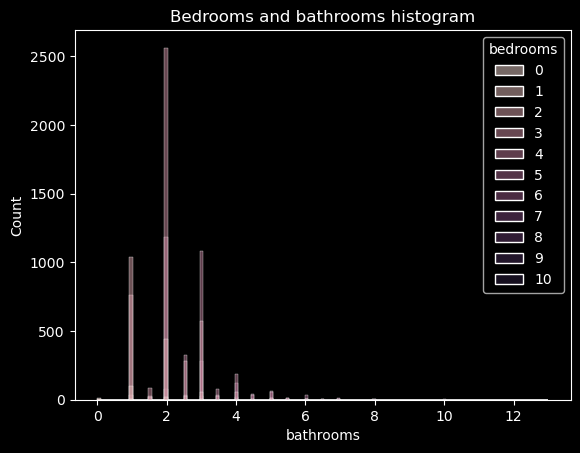

In [35]:
sns.histplot(data=train.sample(10000), x='bathrooms', hue='bedrooms')
plt.title('Bedrooms and bathrooms histogram')
plt.show()

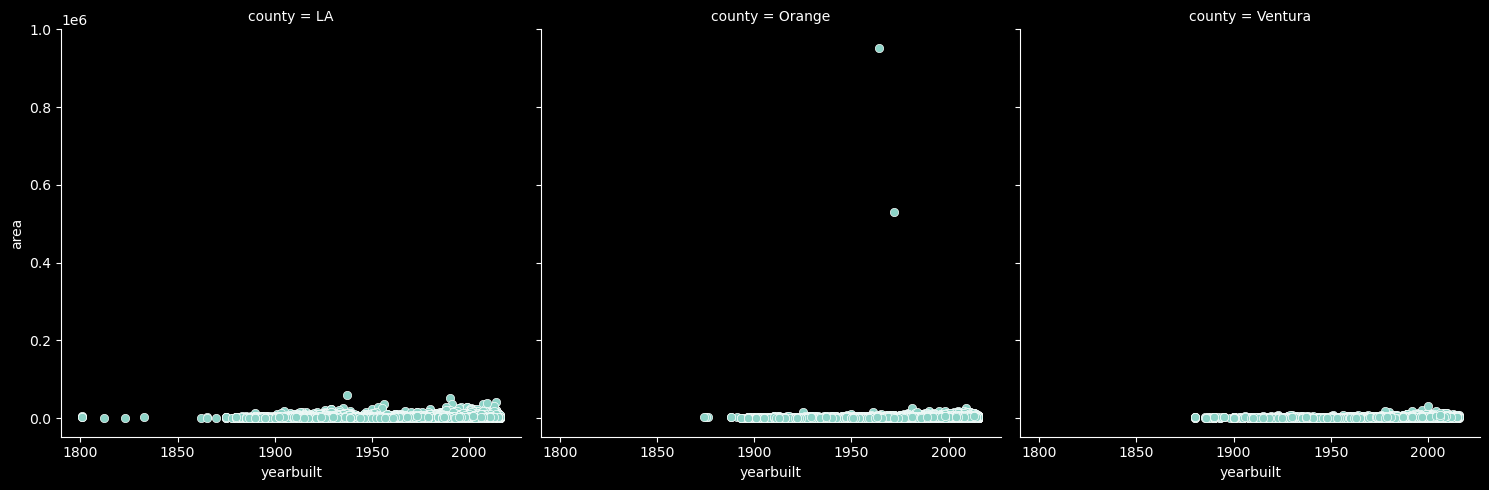

In [48]:
sns.relplot(data=train, x='yearbuilt', y='area', col='county')


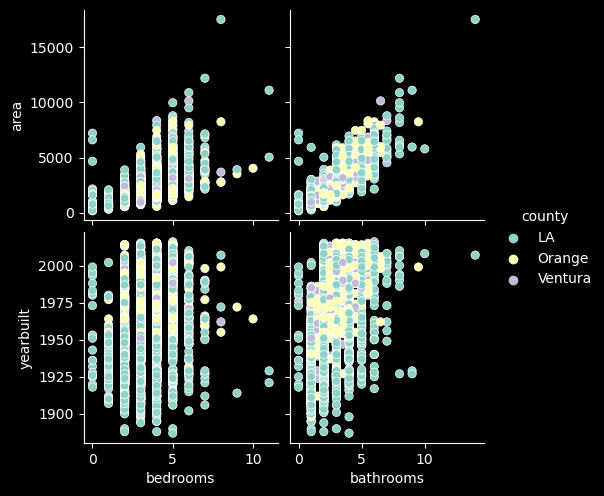

In [54]:
sns.pairplot(train.sample(10000), x_vars=['bedrooms', 'bathrooms'], y_vars=['area', 'yearbuilt'],hue='county')